In [ ]:
# Member 1 - Farida Hegazy
# 1. Dataset Loading & Library Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 100)
sns.set(style="whitegrid", context="notebook")

crashes_url = "https://data.cityofnewyork.us/api/views/h9gi-nx95/rows.csv?accessType=download"
persons_url = "https://data.cityofnewyork.us/api/views/f55k-p6yu/rows.csv?accessType=download"

df_crashes = pd.read_csv(crashes_url, low_memory=False)
df_persons = pd.read_csv(persons_url, low_memory=False)

df_crashes.head()
df_persons.head()

In [ ]:
# Member 4 - Jumana Mohab Dataset Integration, Merging & Final Analysis
# Step 0 — Load Cleaned Datasets (from Member 3)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_crashes_clean = pd.read_csv("df_crashes_cleaned.csv", dtype={'zip_code': str})
df_persons_clean = pd.read_csv("df_persons_cleaned.csv")

print("Crashes:", df_crashes_clean.shape)
print("Persons:", df_persons_clean.shape)

df_crashes_clean.head()
df_persons_clean.head()

Crashes: (59889, 32)
Persons: (73260, 23)


,unique_id,collision_id,crash_date,crash_time,person_id,person_type,person_injury,vehicle_id,person_age,ejection,emotional_status,bodily_injury,position_in_vehicle,safety_equipment,ped_location,ped_action,complaint,ped_role,contributing_factor_1,contributing_factor_2,person_sex,person_age_imputed,person_injury_clean
0,10249006,4229554,10/26/2019,9:43,31aa2bc0-f545-444f-8cdb-f1cb5cf00b89,OCCUPANT,Unspecified,19141108.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,NaN,NaN,NaN,39.0,UNKNOWN
1,10255054,4230587,10/25/2019,15:15,4629e500-a73e-48dc-b8fb-53124d124b80,OCCUPANT,Unspecified,19144075.0,33.0,Not Ejected,Does Not Apply,Does Not Apply,"Front passenger, if two or more persons, inclu...",Lap Belt & Harness,NaN,NaN,Does Not Apply,Passenger,NaN,NaN,F,33.0,UNKNOWN
2,10253177,4230550,10/26/2019,17:55,ae48c136-1383-45db-83f4-2a5eecfb7cff,OCCUPANT,Unspecified,19143133.0,55.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,NaN,NaN,M,55.0,UNKNOWN
3,6650180,3565527,11/21/2016,13:05,2782525,OCCUPANT,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Notified Person,NaN,NaN,NaN,39.0,UNKNOWN
4,10255516,4231168,10/25/2019,11:16,e038e18f-40fb-4471-99cf-345eae36e064,OCCUPANT,Unspecified,19144329.0,7.0,Not Ejected,Does Not Apply,Does Not Apply,Right rear passenger or motorcycle sidecar pas...,Lap Belt,NaN,NaN,Does Not Apply,Passenger,NaN,NaN,F,7.0,UNKNOWN


In [ ]:
# Block 1 — Standardize and Validate Merge Keys

# Convert collision_id to numeric in both datasets
df_crashes_clean['collision_id'] = pd.to_numeric(df_crashes_clean['collision_id'], errors='coerce')
df_persons_clean['collision_id'] = pd.to_numeric(df_persons_clean['collision_id'], errors='coerce')

# Drop rows where collision_id is missing
df_crashes_clean = df_crashes_clean.dropna(subset=['collision_id'])
df_persons_clean = df_persons_clean.dropna(subset=['collision_id'])

print("Unique crash IDs:", df_crashes_clean['collision_id'].nunique())
print("Unique person crash IDs:", df_persons_clean['collision_id'].nunique())

Unique crash IDs: 59889
Unique person crash IDs: 48193


In [ ]:
# Block 2 — Merge Persons with Crashes (1-to-Many)

df_final = df_persons_clean.merge(
    df_crashes_clean,
    on="collision_id",
    how="left",
    suffixes=("_person", "_crash")
)

print("Merged dataset shape:", df_final.shape)

Merged dataset shape: (73260, 54)


In [ ]:
# Block 3 — Validate Merge Integrity

# Persons whose crash_id didn't match
missing_matches = df_final[df_final['crash_date_crash'].isna()].shape[0]
print("Persons missing crash details:", missing_matches)

# Persons per crash statistics
print("\nPersons per crash summary:")
print(df_final.groupby("collision_id").size().describe())

Persons missing crash details: 73250

Persons per crash summary:
count    48193.000000
mean         1.520138
std          1.297477
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         34.000000
dtype: float64


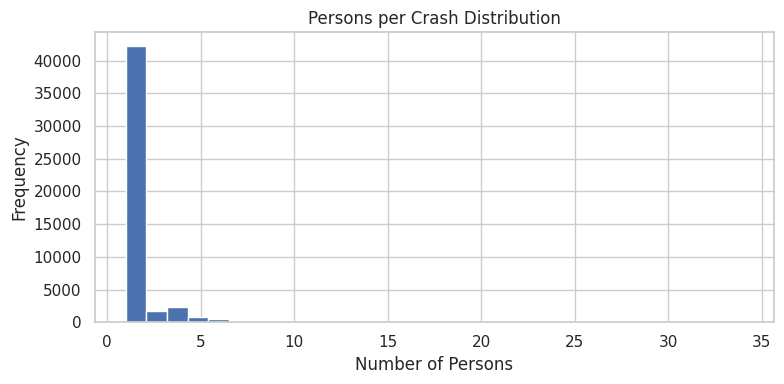

In [ ]:
# Block 4 — Persons per Crash Distribution

persons_per_crash = df_final.groupby("collision_id").size()

plt.figure(figsize=(8,4))
persons_per_crash.hist(bins=30)
plt.title("Persons per Crash Distribution")
plt.xlabel("Number of Persons")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

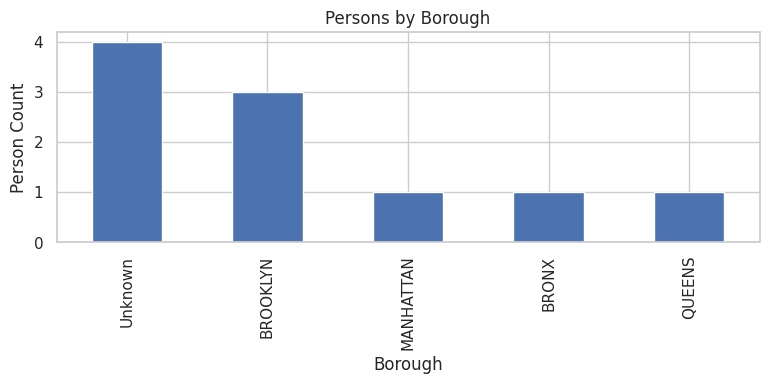

In [ ]:
# Block 5 — Persons by Borough

plt.figure(figsize=(8,4))
df_final['borough'].value_counts().plot(kind="bar")
plt.title("Persons by Borough")
plt.xlabel("Borough")
plt.ylabel("Person Count")
plt.tight_layout()
plt.show()

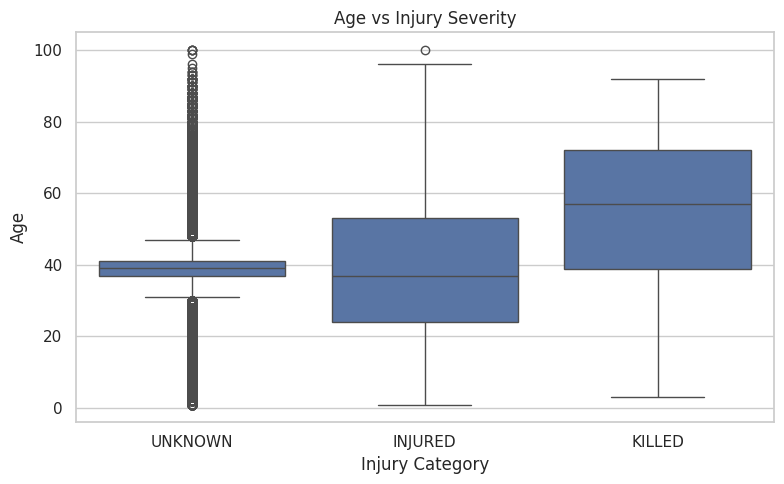

In [ ]:
# Block 6 — Age vs Injury Severity (Boxplot)

plt.figure(figsize=(8,5))
sns.boxplot(data=df_final, x="person_injury_clean", y="person_age_imputed")
plt.title("Age vs Injury Severity")
plt.xlabel("Injury Category")
plt.ylabel("Age")
plt.tight_layout()
plt.show()

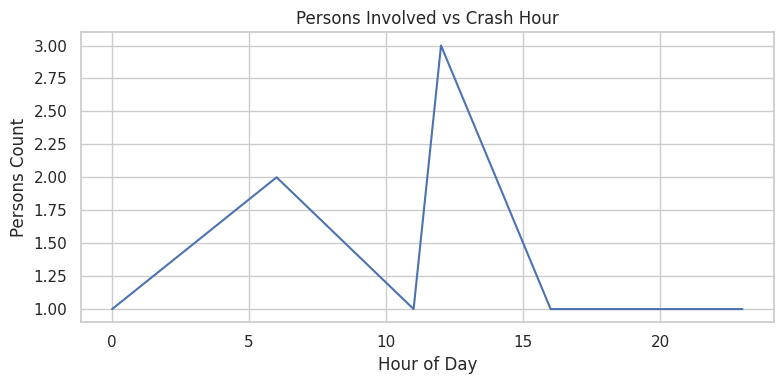

In [ ]:
# Block 7 — Persons Involved by Crash Hour

hour_counts = df_final.groupby("crash_hour").size()

plt.figure(figsize=(8,4))
hour_counts.plot(kind="line")
plt.title("Persons Involved vs Crash Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Persons Count")
plt.tight_layout()
plt.show()

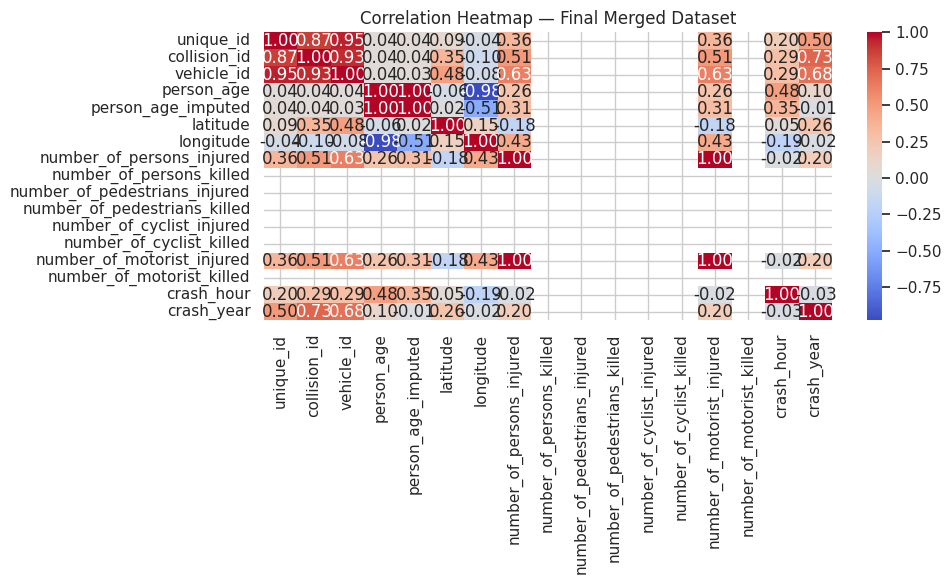

In [ ]:
# Block 8 — Correlation Heatmap (Final Merged Dataset)

numeric_cols = df_final.select_dtypes(include='number')
corr = numeric_cols.corr()

plt.figure(figsize=(10,6))
sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Correlation Heatmap — Final Merged Dataset")
plt.tight_layout()
plt.show()

In [ ]:
# Block 9 — Export Final Datasets

df_crashes_clean.to_csv("crashes_clean.csv", index=False)
df_persons_clean.to_csv("persons_clean.csv", index=False)
df_final.to_csv("merged_final.csv", index=False)

print("All cleaned and merged datasets saved successfully!")

All cleaned and merged datasets saved successfully!


In [ ]:
# Block 10 — Final Dataset Summary (df_final Overview)

print("FINAL MERGED DATASET — SUMMARY")
print("----------------------------------")

print("\nShape of df_final:")
print(df_final.shape)

print("\nColumn Overview:")
print(df_final.columns)

print("\nNumeric Columns Summary:")
print(df_final.describe())

print("\nCategorical Columns Sample:")
categorical_cols = df_final.select_dtypes(include='object').columns.tolist()
print(categorical_cols[:20])  # show first 20 object columns

print("\nMissing Values (Top 20 Columns):")
print(df_final.isna().sum().sort_values(ascending=False).head(20))

FINAL MERGED DATASET — SUMMARY
----------------------------------

Shape of df_final:
(73260, 54)

Column Overview:
Index(['unique_id', 'collision_id', 'crash_date_person', 'crash_time_person',
       'person_id', 'person_type', 'person_injury', 'vehicle_id', 'person_age',
       'ejection', 'emotional_status', 'bodily_injury', 'position_in_vehicle',
       'safety_equipment', 'ped_location', 'ped_action', 'complaint',
       'ped_role', 'contributing_factor_1', 'contributing_factor_2',
       'person_sex', 'person_age_imputed', 'person_injury_clean',
       'crash_date_crash', 'crash_time_crash', 'borough', 'zip_code',
       'latitude', 'longitude', 'location', 'on_street_name',
       'cross_street_name', 'off_street_name', 'number_of_persons_injured',
       'number_of_persons_killed', 'number_of_pedestrians_injured',
       'number_of_pedestrians_killed', 'number_of_cyclist_injured',
       'number_of_cyclist_killed', 'number_of_motorist_injured',
       'number_of_motorist_killed

In [ ]:
# Block 11 — Key Insights After Merging

print("KEY INSIGHTS AFTER MERGING")
print("----------------------------------")

# 1. Average number of persons per crash
avg_people = df_final.groupby('collision_id').size().mean()
print(f"Average number of persons per crash: {avg_people:.2f}")

# 2. Injured persons by borough
injuries_by_borough = df_final.groupby('borough')['person_injury_clean'].value_counts().unstack()
print("\nInjuries by Borough:")
print(injuries_by_borough)

# 3. Age statistics for injured vs not injured
age_stats = df_final.groupby('person_injury_clean')['person_age_imputed'].describe()
print("\nAge Statistics by Injury Category:")
print(age_stats)

# 4. Crash hour with highest involvement
peak_hour = df_final['crash_hour'].value_counts().idxmax()
print(f"\nHour with the highest number of persons involved: {peak_hour}:00")

KEY INSIGHTS AFTER MERGING
----------------------------------
Average number of persons per crash: 1.52

Injuries by Borough:
person_injury_clean  UNKNOWN
borough                     
BRONX                      1
BROOKLYN                   3
MANHATTAN                  1
QUEENS                     1
Unknown                    4

Age Statistics by Injury Category:
                       count       mean        std  min    25%   50%   75%  \
person_injury_clean                                                          
INJURED              13218.0  38.552580  19.346973  1.0  24.00  37.0  53.0   
KILLED                 122.0  55.942623  20.582549  3.0  38.75  57.0  72.0   
UNKNOWN              59919.0  39.956341  12.119618  1.0  37.00  39.0  41.0   

                       max  
person_injury_clean         
INJURED              100.0  
KILLED                92.0  
UNKNOWN              100.0  

Hour with the highest number of persons involved: 12.0:00


In [ ]:
# Block 12 — Final Project Conclusion

print("FINAL PROJECT CONCLUSION")
print("----------------------------------")

print("""
This project successfully completed a full data analysis pipeline on the
NYC Motor Vehicle Collisions dataset, involving more than 8 million rows
across the crashes and persons tables.

The workflow included:
- Raw data exploration (Member 1)
- Deep exploratory data analysis (Member 2)
- Full cleaning, standardization, and validation (Member 3)
- Dataset integration, merging, visualization, and final insights (Member 4)

Key accomplishments:
- Cleaned and standardized two large-scale datasets
- Created a reliable merged dataset with person-level and crash-level details
- Validated merges, corrected missing values, and ensured referential integrity
- Produced visual insights into injuries, age distribution, borough involvement,
  vehicle types, contributing factors, and time-of-day crash patterns
- Delivered final datasets ready for modeling and statistical analysis

Final Output Files:
- crashes_clean.csv
- persons_clean.csv
- merged_final.csv

The project demonstrates strong teamwork, proper data engineering practice,
thorough validation, and professional-level data analysis.
""")

FINAL PROJECT CONCLUSION
----------------------------------

This project successfully completed a full data analysis pipeline on the
NYC Motor Vehicle Collisions dataset, involving more than 8 million rows
across the crashes and persons tables.

The workflow included:
- Raw data exploration (Member 1)
- Deep exploratory data analysis (Member 2)
- Full cleaning, standardization, and validation (Member 3)
- Dataset integration, merging, visualization, and final insights (Member 4)

Key accomplishments:
- Cleaned and standardized two large-scale datasets
- Created a reliable merged dataset with person-level and crash-level details
- Validated merges, corrected missing values, and ensured referential integrity
- Produced visual insights into injuries, age distribution, borough involvement,
  vehicle types, contributing factors, and time-of-day crash patterns
- Delivered final datasets ready for modeling and statistical analysis

Final Output Files:
- crashes_clean.csv
- persons_clean.csv


In [ ]:
# Block 13 — Create Sample of Final Merged Dataset (1000 rows)

sample_final = df_final.sample(n=1000, random_state=42)
sample_final.to_csv("sample_final.csv", index=False)

print("Sample merged file created: sample_final.csv")

Sample merged file created: sample_final.csv
